This notebook use mcvine.phonon.powderSQE.from_phonon_data_dir.
The calculation produces pretty good result. However, it seems that we may need more points at qx and qy directions, or we should use a random sampling of the Q space (MC).

In [1]:
import numpy as np, os, glob

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
import histogram.hdf as hh, histogram as H

In [4]:
workdir = '_tmp.model-coherent-SQE'
!mkdir -p {workdir}
%cd {workdir}

/home/lj7/dv/mcvine/phonon/tests/phonon/powderSQE/_tmp.model-coherent-SQE


# Force constants

In [20]:
datadir = os.path.abspath('../../../data/graphite/')
!ls {datadir}

exp_DOS.h5  FORCE_CONSTANTS  POSCAR  SPOSCAR


## From SPOSCAR and POSCAR we can know supercell grid

In [21]:
!head -n 10 {datadir}/SPOSCAR

C
   1.0
    14.6771349835800002    0.0000000000000000    0.0000000000000000
    -7.3385674918200010   12.7107717505800011    0.0000000000000000
     0.0000000000000000    0.0000000000000000    6.6542290476200003
 144
Direct
  0.0000000000000000  0.0000000000000000  0.2500000000000000
  0.1666666666666667  0.0000000000000000  0.2500000000000000
  0.3333333333333333  0.0000000000000000  0.2500000000000000


In [22]:
cat {datadir}/POSCAR

C
    1.0
       2.44618916393 0.00000000000   0.00000000000           
      -1.22309458197 2.11846195843   0.00000000000
       0.00000000000   0.00000000000 6.65422904762 
  4
Direct
        0.00000000 0.00000000 0.25000000
        0.00000000 0.00000000 0.75000000
        0.33333333 0.66666667 0.25000000
        0.66666667 0.33333333 0.75000000


In [10]:
6*6*4

144

# Compute phonon data

In [24]:
%%time
from mcvine.phonon.from_phonopy import make_all
!mkdir -p phonon
%cd phonon
!cp {datadir}/* .

make_all(
    species=['C'], supercell_dims=[6,6,1],
    qgrid_dims=[101,101,31],
    fix_pols_phase=True,
    force_constants='FORCE_CONSTANTS', poscar='POSCAR',
)
%cd -

/home/lj7/dv/mcvine/phonon/tests/phonon/powderSQE/_tmp.model-coherent-SQE/phonon
* Constructing Q array
* Calling phonopy to compute eigen values and eigen vectors
* Writing out freqencies
* Fixing and writing out polarizations
* Fixing phase: exp(-i Q.d)
203.120864564
/home/lj7/dv/mcvine/phonon/tests/phonon/powderSQE/_tmp.model-coherent-SQE
CPU times: user 10min 24s, sys: 17min 31s, total: 27min 56s
Wall time: 2min 36s


# Compute IQE

In [25]:
import mcvine.phonon.powderSQE.IDF as psidf
reload(psidf)

<module 'mcvine.phonon.powderSQE.IDF' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcvine/phonon/powderSQE/IDF.pyc'>

In [26]:
%%time
IQEhist = psidf.from_data_dir(
    'phonon', 
    max_hkl=25,
    Q_bins=np.arange(0, 22, 0.1), E_bins=np.arange(0,250, .5)
)

[-10   3  -6]
[-10   3  -5]
[-10   3  -4]
[-10   3  -3]
[-10   3  -2]
[-10   3  -1]
[-10   3   0]
[-10   3   1]
[-10   3   2]
[-10   3   3]
[-10   3   4]
[-10   3   5]
[-10   3   6]
[-10   4  -8]
[-10   4  -7]
[-10   4  -6]
[-10   4  -5]
[-10   4  -4]
[-10   4  -3]
[-10   4  -2]
[-10   4  -1]
[-10   4   0]
[-10   4   1]
[-10   4   2]
[-10   4   3]
[-10   4   4]
[-10   4   5]
[-10   4   6]
[-10   4   7]
[-10   4   8]
[-10   5  -9]
[-10   5  -8]
[-10   5  -7]
[-10   5  -6]
[-10   5  -5]
[-10   5  -4]
[-10   5  -3]
[-10   5  -2]
[-10   5  -1]
[-10   5   0]
[-10   5   1]
[-10   5   2]
[-10   5   3]
[-10   5   4]
[-10   5   5]
[-10   5   6]
[-10   5   7]
[-10   5   8]
[-10   5   9]
[-10   6  -8]
[-10   6  -7]
[-10   6  -6]
[-10   6  -5]
[-10   6  -4]
[-10   6  -3]
[-10   6  -2]
[-10   6  -1]
[-10   6   0]
[-10   6   1]
[-10   6   2]
[-10   6   3]
[-10   6   4]
[-10   6   5]
[-10   6   6]
[-10   6   7]
[-10   6   8]
[-10   7  -6]
[-10   7  -5]
[-10   7  -4]
[-10   7  -3]
[-10   7  -2]
[-10  

[-7 -1 -7]
[-7 -1 -6]
[-7 -1 -5]
[-7 -1 -4]
[-7 -1 -3]
[-7 -1 -2]
[-7 -1 -1]
[-7 -1  0]
[-7 -1  1]
[-7 -1  2]
[-7 -1  3]
[-7 -1  4]
[-7 -1  5]
[-7 -1  6]
[-7 -1  7]
[-7 -1  8]
[-7 -1  9]
[-7 -1 10]
[-7 -1 11]
[-7 -1 12]
[-7 -1 13]
[-7 -1 14]
[-7 -1 15]
[-7 -1 16]
[ -7   0 -18]
[ -7   0 -17]
[ -7   0 -16]
[ -7   0 -15]
[ -7   0 -14]
[ -7   0 -13]
[ -7   0 -12]
[ -7   0 -11]
[ -7   0 -10]
[-7  0 -9]
[-7  0 -8]
[-7  0 -7]
[-7  0 -6]
[-7  0 -5]
[-7  0 -4]
[-7  0 -3]
[-7  0 -2]
[-7  0 -1]
[-7  0  0]
[-7  0  1]
[-7  0  2]
[-7  0  3]
[-7  0  4]
[-7  0  5]
[-7  0  6]
[-7  0  7]
[-7  0  8]
[-7  0  9]
[-7  0 10]
[-7  0 11]
[-7  0 12]
[-7  0 13]
[-7  0 14]
[-7  0 15]
[-7  0 16]
[-7  0 17]
[-7  0 18]
[ -7   1 -19]
[ -7   1 -18]
[ -7   1 -17]
[ -7   1 -16]
[ -7   1 -15]
[ -7   1 -14]
[ -7   1 -13]
[ -7   1 -12]
[ -7   1 -11]
[ -7   1 -10]
[-7  1 -9]
[-7  1 -8]
[-7  1 -7]
[-7  1 -6]
[-7  1 -5]
[-7  1 -4]
[-7  1 -3]
[-7  1 -2]
[-7  1 -1]
[-7  1  0]
[-7  1  1]
[-7  1  2]
[-7  1  3]
[-7  1  4]
[-7  1  

[-6  3  6]
[-6  3  7]
[-6  3  8]
[-6  3  9]
[-6  3 10]
[-6  3 11]
[-6  3 12]
[-6  3 13]
[-6  3 14]
[-6  3 15]
[-6  3 16]
[-6  3 17]
[-6  3 18]
[-6  3 19]
[-6  3 20]
[-6  3 21]
[-6  3 22]
[-6  3 23]
[ -6   4 -23]
[ -6   4 -22]
[ -6   4 -21]
[ -6   4 -20]
[ -6   4 -19]
[ -6   4 -18]
[ -6   4 -17]
[ -6   4 -16]
[ -6   4 -15]
[ -6   4 -14]
[ -6   4 -13]
[ -6   4 -12]
[ -6   4 -11]
[ -6   4 -10]
[-6  4 -9]
[-6  4 -8]
[-6  4 -7]
[-6  4 -6]
[-6  4 -5]
[-6  4 -4]
[-6  4 -3]
[-6  4 -2]
[-6  4 -1]
[-6  4  0]
[-6  4  1]
[-6  4  2]
[-6  4  3]
[-6  4  4]
[-6  4  5]
[-6  4  6]
[-6  4  7]
[-6  4  8]
[-6  4  9]
[-6  4 10]
[-6  4 11]
[-6  4 12]
[-6  4 13]
[-6  4 14]
[-6  4 15]
[-6  4 16]
[-6  4 17]
[-6  4 18]
[-6  4 19]
[-6  4 20]
[-6  4 21]
[-6  4 22]
[-6  4 23]
[ -6   5 -22]
[ -6   5 -21]
[ -6   5 -20]
[ -6   5 -19]
[ -6   5 -18]
[ -6   5 -17]
[ -6   5 -16]
[ -6   5 -15]
[ -6   5 -14]
[ -6   5 -13]
[ -6   5 -12]
[ -6   5 -11]
[ -6   5 -10]
[-6  5 -9]
[-6  5 -8]
[-6  5 -7]
[-6  5 -6]
[-6  5 -5]
[-6  5

[ -5   5 -18]
[ -5   5 -17]
[ -5   5 -16]
[ -5   5 -15]
[ -5   5 -14]
[ -5   5 -13]
[ -5   5 -12]
[ -5   5 -11]
[ -5   5 -10]
[-5  5 -9]
[-5  5 -8]
[-5  5 -7]
[-5  5 -6]
[-5  5 -5]
[-5  5 -4]
[-5  5 -3]
[-5  5 -2]
[-5  5 -1]
[-5  5  0]
[-5  5  1]
[-5  5  2]
[-5  5  3]
[-5  5  4]
[-5  5  5]
[-5  5  6]
[-5  5  7]
[-5  5  8]
[-5  5  9]
[-5  5 10]
[-5  5 11]
[-5  5 12]
[-5  5 13]
[-5  5 14]
[-5  5 15]
[-5  5 16]
[-5  5 17]
[-5  5 18]
[-5  5 19]
[-5  5 20]
[-5  5 21]
[-5  5 22]
[-5  5 23]
[ -5   6 -22]
[ -5   6 -21]
[ -5   6 -20]
[ -5   6 -19]
[ -5   6 -18]
[ -5   6 -17]
[ -5   6 -16]
[ -5   6 -15]
[ -5   6 -14]
[ -5   6 -13]
[ -5   6 -12]
[ -5   6 -11]
[ -5   6 -10]
[-5  6 -9]
[-5  6 -8]
[-5  6 -7]
[-5  6 -6]
[-5  6 -5]
[-5  6 -4]
[-5  6 -3]
[-5  6 -2]
[-5  6 -1]
[-5  6  0]
[-5  6  1]
[-5  6  2]
[-5  6  3]
[-5  6  4]
[-5  6  5]
[-5  6  6]
[-5  6  7]
[-5  6  8]
[-5  6  9]
[-5  6 10]
[-5  6 11]
[-5  6 12]
[-5  6 13]
[-5  6 14]
[-5  6 15]
[-5  6 16]
[-5  6 17]
[-5  6 18]
[-5  6 19]
[-5  6 20]

[ -4   5 -19]
[ -4   5 -18]
[ -4   5 -17]
[ -4   5 -16]
[ -4   5 -15]
[ -4   5 -14]
[ -4   5 -13]
[ -4   5 -12]
[ -4   5 -11]
[ -4   5 -10]
[-4  5 -9]
[-4  5 -8]
[-4  5 -7]
[-4  5 -6]
[-4  5 -5]
[-4  5 -4]
[-4  5 -3]
[-4  5 -2]
[-4  5 -1]
[-4  5  0]
[-4  5  1]
[-4  5  2]
[-4  5  3]
[-4  5  4]
[-4  5  5]
[-4  5  6]
[-4  5  7]
[-4  5  8]
[-4  5  9]
[-4  5 10]
[-4  5 11]
[-4  5 12]
[-4  5 13]
[-4  5 14]
[-4  5 15]
[-4  5 16]
[-4  5 17]
[-4  5 18]
[-4  5 19]
[-4  5 20]
[-4  5 21]
[-4  5 22]
[-4  5 23]
[-4  5 24]
[ -4   6 -23]
[ -4   6 -22]
[ -4   6 -21]
[ -4   6 -20]
[ -4   6 -19]
[ -4   6 -18]
[ -4   6 -17]
[ -4   6 -16]
[ -4   6 -15]
[ -4   6 -14]
[ -4   6 -13]
[ -4   6 -12]
[ -4   6 -11]
[ -4   6 -10]
[-4  6 -9]
[-4  6 -8]
[-4  6 -7]
[-4  6 -6]
[-4  6 -5]
[-4  6 -4]
[-4  6 -3]
[-4  6 -2]
[-4  6 -1]
[-4  6  0]
[-4  6  1]
[-4  6  2]
[-4  6  3]
[-4  6  4]
[-4  6  5]
[-4  6  6]
[-4  6  7]
[-4  6  8]
[-4  6  9]
[-4  6 10]
[-4  6 11]
[-4  6 12]
[-4  6 13]
[-4  6 14]
[-4  6 15]
[-4  6 16]
[-4 

[ -3   4 -23]
[ -3   4 -22]
[ -3   4 -21]
[ -3   4 -20]
[ -3   4 -19]
[ -3   4 -18]
[ -3   4 -17]
[ -3   4 -16]
[ -3   4 -15]
[ -3   4 -14]
[ -3   4 -13]
[ -3   4 -12]
[ -3   4 -11]
[ -3   4 -10]
[-3  4 -9]
[-3  4 -8]
[-3  4 -7]
[-3  4 -6]
[-3  4 -5]
[-3  4 -4]
[-3  4 -3]
[-3  4 -2]
[-3  4 -1]
[-3  4  0]
[-3  4  1]
[-3  4  2]
[-3  4  3]
[-3  4  4]
[-3  4  5]
[-3  4  6]
[-3  4  7]
[-3  4  8]
[-3  4  9]
[-3  4 10]
[-3  4 11]
[-3  4 12]
[-3  4 13]
[-3  4 14]
[-3  4 15]
[-3  4 16]
[-3  4 17]
[-3  4 18]
[-3  4 19]
[-3  4 20]
[-3  4 21]
[-3  4 22]
[-3  4 23]
[-3  4 24]
[-3  4 25]
[ -3   5 -25]
[ -3   5 -24]
[ -3   5 -23]
[ -3   5 -22]
[ -3   5 -21]
[ -3   5 -20]
[ -3   5 -19]
[ -3   5 -18]
[ -3   5 -17]
[ -3   5 -16]
[ -3   5 -15]
[ -3   5 -14]
[ -3   5 -13]
[ -3   5 -12]
[ -3   5 -11]
[ -3   5 -10]
[-3  5 -9]
[-3  5 -8]
[-3  5 -7]
[-3  5 -6]
[-3  5 -5]
[-3  5 -4]
[-3  5 -3]
[-3  5 -2]
[-3  5 -1]
[-3  5  0]
[-3  5  1]
[-3  5  2]
[-3  5  3]
[-3  5  4]
[-3  5  5]
[-3  5  6]
[-3  5  7]
[-3  5  

[-2  2 -7]
[-2  2 -6]
[-2  2 -5]
[-2  2 -4]
[-2  2 -3]
[-2  2 -2]
[-2  2 -1]
[-2  2  0]
[-2  2  1]
[-2  2  2]
[-2  2  3]
[-2  2  4]
[-2  2  5]
[-2  2  6]
[-2  2  7]
[-2  2  8]
[-2  2  9]
[-2  2 10]
[-2  2 11]
[-2  2 12]
[-2  2 13]
[-2  2 14]
[-2  2 15]
[-2  2 16]
[-2  2 17]
[-2  2 18]
[-2  2 19]
[-2  2 20]
[-2  2 21]
[-2  2 22]
[-2  2 23]
[-2  2 24]
[-2  2 25]
[ -2   3 -25]
[ -2   3 -24]
[ -2   3 -23]
[ -2   3 -22]
[ -2   3 -21]
[ -2   3 -20]
[ -2   3 -19]
[ -2   3 -18]
[ -2   3 -17]
[ -2   3 -16]
[ -2   3 -15]
[ -2   3 -14]
[ -2   3 -13]
[ -2   3 -12]
[ -2   3 -11]
[ -2   3 -10]
[-2  3 -9]
[-2  3 -8]
[-2  3 -7]
[-2  3 -6]
[-2  3 -5]
[-2  3 -4]
[-2  3 -3]
[-2  3 -2]
[-2  3 -1]
[-2  3  0]
[-2  3  1]
[-2  3  2]
[-2  3  3]
[-2  3  4]
[-2  3  5]
[-2  3  6]
[-2  3  7]
[-2  3  8]
[-2  3  9]
[-2  3 10]
[-2  3 11]
[-2  3 12]
[-2  3 13]
[-2  3 14]
[-2  3 15]
[-2  3 16]
[-2  3 17]
[-2  3 18]
[-2  3 19]
[-2  3 20]
[-2  3 21]
[-2  3 22]
[-2  3 23]
[-2  3 24]
[-2  3 25]
[ -2   4 -25]
[ -2   4 -24]


[-1  0 -7]
[-1  0 -6]
[-1  0 -5]
[-1  0 -4]
[-1  0 -3]
[-1  0 -2]
[-1  0 -1]
[-1  0  0]
[-1  0  1]
[-1  0  2]
[-1  0  3]
[-1  0  4]
[-1  0  5]
[-1  0  6]
[-1  0  7]
[-1  0  8]
[-1  0  9]
[-1  0 10]
[-1  0 11]
[-1  0 12]
[-1  0 13]
[-1  0 14]
[-1  0 15]
[-1  0 16]
[-1  0 17]
[-1  0 18]
[-1  0 19]
[-1  0 20]
[-1  0 21]
[-1  0 22]
[-1  0 23]
[-1  0 24]
[-1  0 25]
[ -1   1 -25]
[ -1   1 -24]
[ -1   1 -23]
[ -1   1 -22]
[ -1   1 -21]
[ -1   1 -20]
[ -1   1 -19]
[ -1   1 -18]
[ -1   1 -17]
[ -1   1 -16]
[ -1   1 -15]
[ -1   1 -14]
[ -1   1 -13]
[ -1   1 -12]
[ -1   1 -11]
[ -1   1 -10]
[-1  1 -9]
[-1  1 -8]
[-1  1 -7]
[-1  1 -6]
[-1  1 -5]
[-1  1 -4]
[-1  1 -3]
[-1  1 -2]
[-1  1 -1]
[-1  1  0]
[-1  1  1]
[-1  1  2]
[-1  1  3]
[-1  1  4]
[-1  1  5]
[-1  1  6]
[-1  1  7]
[-1  1  8]
[-1  1  9]
[-1  1 10]
[-1  1 11]
[-1  1 12]
[-1  1 13]
[-1  1 14]
[-1  1 15]
[-1  1 16]
[-1  1 17]
[-1  1 18]
[-1  1 19]
[-1  1 20]
[-1  1 21]
[-1  1 22]
[-1  1 23]
[-1  1 24]
[-1  1 25]
[ -1   2 -25]
[ -1   2 -24]


[  0  -2 -19]
[  0  -2 -18]
[  0  -2 -17]
[  0  -2 -16]
[  0  -2 -15]
[  0  -2 -14]
[  0  -2 -13]
[  0  -2 -12]
[  0  -2 -11]
[  0  -2 -10]
[ 0 -2 -9]
[ 0 -2 -8]
[ 0 -2 -7]
[ 0 -2 -6]
[ 0 -2 -5]
[ 0 -2 -4]
[ 0 -2 -3]
[ 0 -2 -2]
[ 0 -2 -1]
[ 0 -2  0]
[ 0 -2  1]
[ 0 -2  2]
[ 0 -2  3]
[ 0 -2  4]
[ 0 -2  5]
[ 0 -2  6]
[ 0 -2  7]
[ 0 -2  8]
[ 0 -2  9]
[ 0 -2 10]
[ 0 -2 11]
[ 0 -2 12]
[ 0 -2 13]
[ 0 -2 14]
[ 0 -2 15]
[ 0 -2 16]
[ 0 -2 17]
[ 0 -2 18]
[ 0 -2 19]
[ 0 -2 20]
[ 0 -2 21]
[ 0 -2 22]
[ 0 -2 23]
[ 0 -2 24]
[ 0 -2 25]
[  0  -1 -25]
[  0  -1 -24]
[  0  -1 -23]
[  0  -1 -22]
[  0  -1 -21]
[  0  -1 -20]
[  0  -1 -19]
[  0  -1 -18]
[  0  -1 -17]
[  0  -1 -16]
[  0  -1 -15]
[  0  -1 -14]
[  0  -1 -13]
[  0  -1 -12]
[  0  -1 -11]
[  0  -1 -10]
[ 0 -1 -9]
[ 0 -1 -8]
[ 0 -1 -7]
[ 0 -1 -6]
[ 0 -1 -5]
[ 0 -1 -4]
[ 0 -1 -3]
[ 0 -1 -2]
[ 0 -1 -1]
[ 0 -1  0]
[ 0 -1  1]
[ 0 -1  2]
[ 0 -1  3]
[ 0 -1  4]
[ 0 -1  5]
[ 0 -1  6]
[ 0 -1  7]
[ 0 -1  8]
[ 0 -1  9]
[ 0 -1 10]
[ 0 -1 11]
[ 0 -1 12]
[ 0 -1 13

[  1  -4 -11]
[  1  -4 -10]
[ 1 -4 -9]
[ 1 -4 -8]
[ 1 -4 -7]
[ 1 -4 -6]
[ 1 -4 -5]
[ 1 -4 -4]
[ 1 -4 -3]
[ 1 -4 -2]
[ 1 -4 -1]
[ 1 -4  0]
[ 1 -4  1]
[ 1 -4  2]
[ 1 -4  3]
[ 1 -4  4]
[ 1 -4  5]
[ 1 -4  6]
[ 1 -4  7]
[ 1 -4  8]
[ 1 -4  9]
[ 1 -4 10]
[ 1 -4 11]
[ 1 -4 12]
[ 1 -4 13]
[ 1 -4 14]
[ 1 -4 15]
[ 1 -4 16]
[ 1 -4 17]
[ 1 -4 18]
[ 1 -4 19]
[ 1 -4 20]
[ 1 -4 21]
[ 1 -4 22]
[ 1 -4 23]
[ 1 -4 24]
[ 1 -4 25]
[  1  -3 -25]
[  1  -3 -24]
[  1  -3 -23]
[  1  -3 -22]
[  1  -3 -21]
[  1  -3 -20]
[  1  -3 -19]
[  1  -3 -18]
[  1  -3 -17]
[  1  -3 -16]
[  1  -3 -15]
[  1  -3 -14]
[  1  -3 -13]
[  1  -3 -12]
[  1  -3 -11]
[  1  -3 -10]
[ 1 -3 -9]
[ 1 -3 -8]
[ 1 -3 -7]
[ 1 -3 -6]
[ 1 -3 -5]
[ 1 -3 -4]
[ 1 -3 -3]
[ 1 -3 -2]
[ 1 -3 -1]
[ 1 -3  0]
[ 1 -3  1]
[ 1 -3  2]
[ 1 -3  3]
[ 1 -3  4]
[ 1 -3  5]
[ 1 -3  6]
[ 1 -3  7]
[ 1 -3  8]
[ 1 -3  9]
[ 1 -3 10]
[ 1 -3 11]
[ 1 -3 12]
[ 1 -3 13]
[ 1 -3 14]
[ 1 -3 15]
[ 1 -3 16]
[ 1 -3 17]
[ 1 -3 18]
[ 1 -3 19]
[ 1 -3 20]
[ 1 -3 21]
[ 1 -3 22]
[ 1 -3 23]


[ 2 -6 11]
[ 2 -6 12]
[ 2 -6 13]
[ 2 -6 14]
[ 2 -6 15]
[ 2 -6 16]
[ 2 -6 17]
[ 2 -6 18]
[ 2 -6 19]
[ 2 -6 20]
[ 2 -6 21]
[ 2 -6 22]
[ 2 -6 23]
[  2  -5 -25]
[  2  -5 -24]
[  2  -5 -23]
[  2  -5 -22]
[  2  -5 -21]
[  2  -5 -20]
[  2  -5 -19]
[  2  -5 -18]
[  2  -5 -17]
[  2  -5 -16]
[  2  -5 -15]
[  2  -5 -14]
[  2  -5 -13]
[  2  -5 -12]
[  2  -5 -11]
[  2  -5 -10]
[ 2 -5 -9]
[ 2 -5 -8]
[ 2 -5 -7]
[ 2 -5 -6]
[ 2 -5 -5]
[ 2 -5 -4]
[ 2 -5 -3]
[ 2 -5 -2]
[ 2 -5 -1]
[ 2 -5  0]
[ 2 -5  1]
[ 2 -5  2]
[ 2 -5  3]
[ 2 -5  4]
[ 2 -5  5]
[ 2 -5  6]
[ 2 -5  7]
[ 2 -5  8]
[ 2 -5  9]
[ 2 -5 10]
[ 2 -5 11]
[ 2 -5 12]
[ 2 -5 13]
[ 2 -5 14]
[ 2 -5 15]
[ 2 -5 16]
[ 2 -5 17]
[ 2 -5 18]
[ 2 -5 19]
[ 2 -5 20]
[ 2 -5 21]
[ 2 -5 22]
[ 2 -5 23]
[ 2 -5 24]
[ 2 -5 25]
[  2  -4 -25]
[  2  -4 -24]
[  2  -4 -23]
[  2  -4 -22]
[  2  -4 -21]
[  2  -4 -20]
[  2  -4 -19]
[  2  -4 -18]
[  2  -4 -17]
[  2  -4 -16]
[  2  -4 -15]
[  2  -4 -14]
[  2  -4 -13]
[  2  -4 -12]
[  2  -4 -11]
[  2  -4 -10]
[ 2 -4 -9]
[ 2 -4 -8]
[ 

[  3  -7 -12]
[  3  -7 -11]
[  3  -7 -10]
[ 3 -7 -9]
[ 3 -7 -8]
[ 3 -7 -7]
[ 3 -7 -6]
[ 3 -7 -5]
[ 3 -7 -4]
[ 3 -7 -3]
[ 3 -7 -2]
[ 3 -7 -1]
[ 3 -7  0]
[ 3 -7  1]
[ 3 -7  2]
[ 3 -7  3]
[ 3 -7  4]
[ 3 -7  5]
[ 3 -7  6]
[ 3 -7  7]
[ 3 -7  8]
[ 3 -7  9]
[ 3 -7 10]
[ 3 -7 11]
[ 3 -7 12]
[ 3 -7 13]
[ 3 -7 14]
[ 3 -7 15]
[ 3 -7 16]
[ 3 -7 17]
[ 3 -7 18]
[ 3 -7 19]
[ 3 -7 20]
[ 3 -7 21]
[  3  -6 -23]
[  3  -6 -22]
[  3  -6 -21]
[  3  -6 -20]
[  3  -6 -19]
[  3  -6 -18]
[  3  -6 -17]
[  3  -6 -16]
[  3  -6 -15]
[  3  -6 -14]
[  3  -6 -13]
[  3  -6 -12]
[  3  -6 -11]
[  3  -6 -10]
[ 3 -6 -9]
[ 3 -6 -8]
[ 3 -6 -7]
[ 3 -6 -6]
[ 3 -6 -5]
[ 3 -6 -4]
[ 3 -6 -3]
[ 3 -6 -2]
[ 3 -6 -1]
[ 3 -6  0]
[ 3 -6  1]
[ 3 -6  2]
[ 3 -6  3]
[ 3 -6  4]
[ 3 -6  5]
[ 3 -6  6]
[ 3 -6  7]
[ 3 -6  8]
[ 3 -6  9]
[ 3 -6 10]
[ 3 -6 11]
[ 3 -6 12]
[ 3 -6 13]
[ 3 -6 14]
[ 3 -6 15]
[ 3 -6 16]
[ 3 -6 17]
[ 3 -6 18]
[ 3 -6 19]
[ 3 -6 20]
[ 3 -6 21]
[ 3 -6 22]
[ 3 -6 23]
[  3  -5 -25]
[  3  -5 -24]
[  3  -5 -23]
[  3  -5 -22]
[ 

[  4  -8 -13]
[  4  -8 -12]
[  4  -8 -11]
[  4  -8 -10]
[ 4 -8 -9]
[ 4 -8 -8]
[ 4 -8 -7]
[ 4 -8 -6]
[ 4 -8 -5]
[ 4 -8 -4]
[ 4 -8 -3]
[ 4 -8 -2]
[ 4 -8 -1]
[ 4 -8  0]
[ 4 -8  1]
[ 4 -8  2]
[ 4 -8  3]
[ 4 -8  4]
[ 4 -8  5]
[ 4 -8  6]
[ 4 -8  7]
[ 4 -8  8]
[ 4 -8  9]
[ 4 -8 10]
[ 4 -8 11]
[ 4 -8 12]
[ 4 -8 13]
[ 4 -8 14]
[ 4 -8 15]
[ 4 -8 16]
[ 4 -8 17]
[ 4 -8 18]
[  4  -7 -21]
[  4  -7 -20]
[  4  -7 -19]
[  4  -7 -18]
[  4  -7 -17]
[  4  -7 -16]
[  4  -7 -15]
[  4  -7 -14]
[  4  -7 -13]
[  4  -7 -12]
[  4  -7 -11]
[  4  -7 -10]
[ 4 -7 -9]
[ 4 -7 -8]
[ 4 -7 -7]
[ 4 -7 -6]
[ 4 -7 -5]
[ 4 -7 -4]
[ 4 -7 -3]
[ 4 -7 -2]
[ 4 -7 -1]
[ 4 -7  0]
[ 4 -7  1]
[ 4 -7  2]
[ 4 -7  3]
[ 4 -7  4]
[ 4 -7  5]
[ 4 -7  6]
[ 4 -7  7]
[ 4 -7  8]
[ 4 -7  9]
[ 4 -7 10]
[ 4 -7 11]
[ 4 -7 12]
[ 4 -7 13]
[ 4 -7 14]
[ 4 -7 15]
[ 4 -7 16]
[ 4 -7 17]
[ 4 -7 18]
[ 4 -7 19]
[ 4 -7 20]
[ 4 -7 21]
[  4  -6 -23]
[  4  -6 -22]
[  4  -6 -21]
[  4  -6 -20]
[  4  -6 -19]
[  4  -6 -18]
[  4  -6 -17]
[  4  -6 -16]
[  4  -6 -15]
[

[ 5 -8 -8]
[ 5 -8 -7]
[ 5 -8 -6]
[ 5 -8 -5]
[ 5 -8 -4]
[ 5 -8 -3]
[ 5 -8 -2]
[ 5 -8 -1]
[ 5 -8  0]
[ 5 -8  1]
[ 5 -8  2]
[ 5 -8  3]
[ 5 -8  4]
[ 5 -8  5]
[ 5 -8  6]
[ 5 -8  7]
[ 5 -8  8]
[ 5 -8  9]
[ 5 -8 10]
[ 5 -8 11]
[ 5 -8 12]
[ 5 -8 13]
[ 5 -8 14]
[ 5 -8 15]
[ 5 -8 16]
[ 5 -8 17]
[ 5 -8 18]
[  5  -7 -20]
[  5  -7 -19]
[  5  -7 -18]
[  5  -7 -17]
[  5  -7 -16]
[  5  -7 -15]
[  5  -7 -14]
[  5  -7 -13]
[  5  -7 -12]
[  5  -7 -11]
[  5  -7 -10]
[ 5 -7 -9]
[ 5 -7 -8]
[ 5 -7 -7]
[ 5 -7 -6]
[ 5 -7 -5]
[ 5 -7 -4]
[ 5 -7 -3]
[ 5 -7 -2]
[ 5 -7 -1]
[ 5 -7  0]
[ 5 -7  1]
[ 5 -7  2]
[ 5 -7  3]
[ 5 -7  4]
[ 5 -7  5]
[ 5 -7  6]
[ 5 -7  7]
[ 5 -7  8]
[ 5 -7  9]
[ 5 -7 10]
[ 5 -7 11]
[ 5 -7 12]
[ 5 -7 13]
[ 5 -7 14]
[ 5 -7 15]
[ 5 -7 16]
[ 5 -7 17]
[ 5 -7 18]
[ 5 -7 19]
[ 5 -7 20]
[  5  -6 -22]
[  5  -6 -21]
[  5  -6 -20]
[  5  -6 -19]
[  5  -6 -18]
[  5  -6 -17]
[  5  -6 -16]
[  5  -6 -15]
[  5  -6 -14]
[  5  -6 -13]
[  5  -6 -12]
[  5  -6 -11]
[  5  -6 -10]
[ 5 -6 -9]
[ 5 -6 -8]
[ 5 -6 -7]
[ 5 

[  6  -6 -12]
[  6  -6 -11]
[  6  -6 -10]
[ 6 -6 -9]
[ 6 -6 -8]
[ 6 -6 -7]
[ 6 -6 -6]
[ 6 -6 -5]
[ 6 -6 -4]
[ 6 -6 -3]
[ 6 -6 -2]
[ 6 -6 -1]
[ 6 -6  0]
[ 6 -6  1]
[ 6 -6  2]
[ 6 -6  3]
[ 6 -6  4]
[ 6 -6  5]
[ 6 -6  6]
[ 6 -6  7]
[ 6 -6  8]
[ 6 -6  9]
[ 6 -6 10]
[ 6 -6 11]
[ 6 -6 12]
[ 6 -6 13]
[ 6 -6 14]
[ 6 -6 15]
[ 6 -6 16]
[ 6 -6 17]
[ 6 -6 18]
[ 6 -6 19]
[ 6 -6 20]
[ 6 -6 21]
[  6  -5 -22]
[  6  -5 -21]
[  6  -5 -20]
[  6  -5 -19]
[  6  -5 -18]
[  6  -5 -17]
[  6  -5 -16]
[  6  -5 -15]
[  6  -5 -14]
[  6  -5 -13]
[  6  -5 -12]
[  6  -5 -11]
[  6  -5 -10]
[ 6 -5 -9]
[ 6 -5 -8]
[ 6 -5 -7]
[ 6 -5 -6]
[ 6 -5 -5]
[ 6 -5 -4]
[ 6 -5 -3]
[ 6 -5 -2]
[ 6 -5 -1]
[ 6 -5  0]
[ 6 -5  1]
[ 6 -5  2]
[ 6 -5  3]
[ 6 -5  4]
[ 6 -5  5]
[ 6 -5  6]
[ 6 -5  7]
[ 6 -5  8]
[ 6 -5  9]
[ 6 -5 10]
[ 6 -5 11]
[ 6 -5 12]
[ 6 -5 13]
[ 6 -5 14]
[ 6 -5 15]
[ 6 -5 16]
[ 6 -5 17]
[ 6 -5 18]
[ 6 -5 19]
[ 6 -5 20]
[ 6 -5 21]
[ 6 -5 22]
[  6  -4 -23]
[  6  -4 -22]
[  6  -4 -21]
[  6  -4 -20]
[  6  -4 -19]
[  6  -4 -18]

[  7  -2 -15]
[  7  -2 -14]
[  7  -2 -13]
[  7  -2 -12]
[  7  -2 -11]
[  7  -2 -10]
[ 7 -2 -9]
[ 7 -2 -8]
[ 7 -2 -7]
[ 7 -2 -6]
[ 7 -2 -5]
[ 7 -2 -4]
[ 7 -2 -3]
[ 7 -2 -2]
[ 7 -2 -1]
[ 7 -2  0]
[ 7 -2  1]
[ 7 -2  2]
[ 7 -2  3]
[ 7 -2  4]
[ 7 -2  5]
[ 7 -2  6]
[ 7 -2  7]
[ 7 -2  8]
[ 7 -2  9]
[ 7 -2 10]
[ 7 -2 11]
[ 7 -2 12]
[ 7 -2 13]
[ 7 -2 14]
[ 7 -2 15]
[ 7 -2 16]
[ 7 -2 17]
[ 7 -2 18]
[ 7 -2 19]
[ 7 -2 20]
[  7  -1 -19]
[  7  -1 -18]
[  7  -1 -17]
[  7  -1 -16]
[  7  -1 -15]
[  7  -1 -14]
[  7  -1 -13]
[  7  -1 -12]
[  7  -1 -11]
[  7  -1 -10]
[ 7 -1 -9]
[ 7 -1 -8]
[ 7 -1 -7]
[ 7 -1 -6]
[ 7 -1 -5]
[ 7 -1 -4]
[ 7 -1 -3]
[ 7 -1 -2]
[ 7 -1 -1]
[ 7 -1  0]
[ 7 -1  1]
[ 7 -1  2]
[ 7 -1  3]
[ 7 -1  4]
[ 7 -1  5]
[ 7 -1  6]
[ 7 -1  7]
[ 7 -1  8]
[ 7 -1  9]
[ 7 -1 10]
[ 7 -1 11]
[ 7 -1 12]
[ 7 -1 13]
[ 7 -1 14]
[ 7 -1 15]
[ 7 -1 16]
[ 7 -1 17]
[ 7 -1 18]
[ 7 -1 19]
[  7   0 -18]
[  7   0 -17]
[  7   0 -16]
[  7   0 -15]
[  7   0 -14]
[  7   0 -13]
[  7   0 -12]
[  7   0 -11]
[  7   0 -10]
[

[ 9 -1 -7]
[ 9 -1 -6]
[ 9 -1 -5]
[ 9 -1 -4]
[ 9 -1 -3]
[ 9 -1 -2]
[ 9 -1 -1]
[ 9 -1  0]
[ 9 -1  1]
[ 9 -1  2]
[ 9 -1  3]
[ 9 -1  4]
[ 9 -1  5]
[ 9 -1  6]
[ 9 -1  7]
[ 9 -1  8]
[ 9 -1  9]
[ 9 -1 10]
[ 9  0 -4]
[ 9  0 -3]
[ 9  0 -2]
[ 9  0 -1]
[9 0 0]
[9 0 1]
[9 0 2]
[9 0 3]
[9 0 4]
[10 -7 -6]
[10 -7 -5]
[10 -7 -4]
[10 -7 -3]
[10 -7 -2]
[10 -7 -1]
[10 -7  0]
[10 -7  1]
[10 -7  2]
[10 -7  3]
[10 -7  4]
[10 -7  5]
[10 -7  6]
[10 -6 -8]
[10 -6 -7]
[10 -6 -6]
[10 -6 -5]
[10 -6 -4]
[10 -6 -3]
[10 -6 -2]
[10 -6 -1]
[10 -6  0]
[10 -6  1]
[10 -6  2]
[10 -6  3]
[10 -6  4]
[10 -6  5]
[10 -6  6]
[10 -6  7]
[10 -6  8]
[10 -5 -9]
[10 -5 -8]
[10 -5 -7]
[10 -5 -6]
[10 -5 -5]
[10 -5 -4]
[10 -5 -3]
[10 -5 -2]
[10 -5 -1]
[10 -5  0]
[10 -5  1]
[10 -5  2]
[10 -5  3]
[10 -5  4]
[10 -5  5]
[10 -5  6]
[10 -5  7]
[10 -5  8]
[10 -5  9]
[10 -4 -8]
[10 -4 -7]
[10 -4 -6]
[10 -4 -5]
[10 -4 -4]
[10 -4 -3]
[10 -4 -2]
[10 -4 -1]
[10 -4  0]
[10 -4  1]
[10 -4  2]
[10 -4  3]
[10 -4  4]
[10 -4  5]
[10 -4  6]
[10 -4  7]
[10

plot z in (0.0, 252065747.485)


<IPython.core.display.Javascript object>


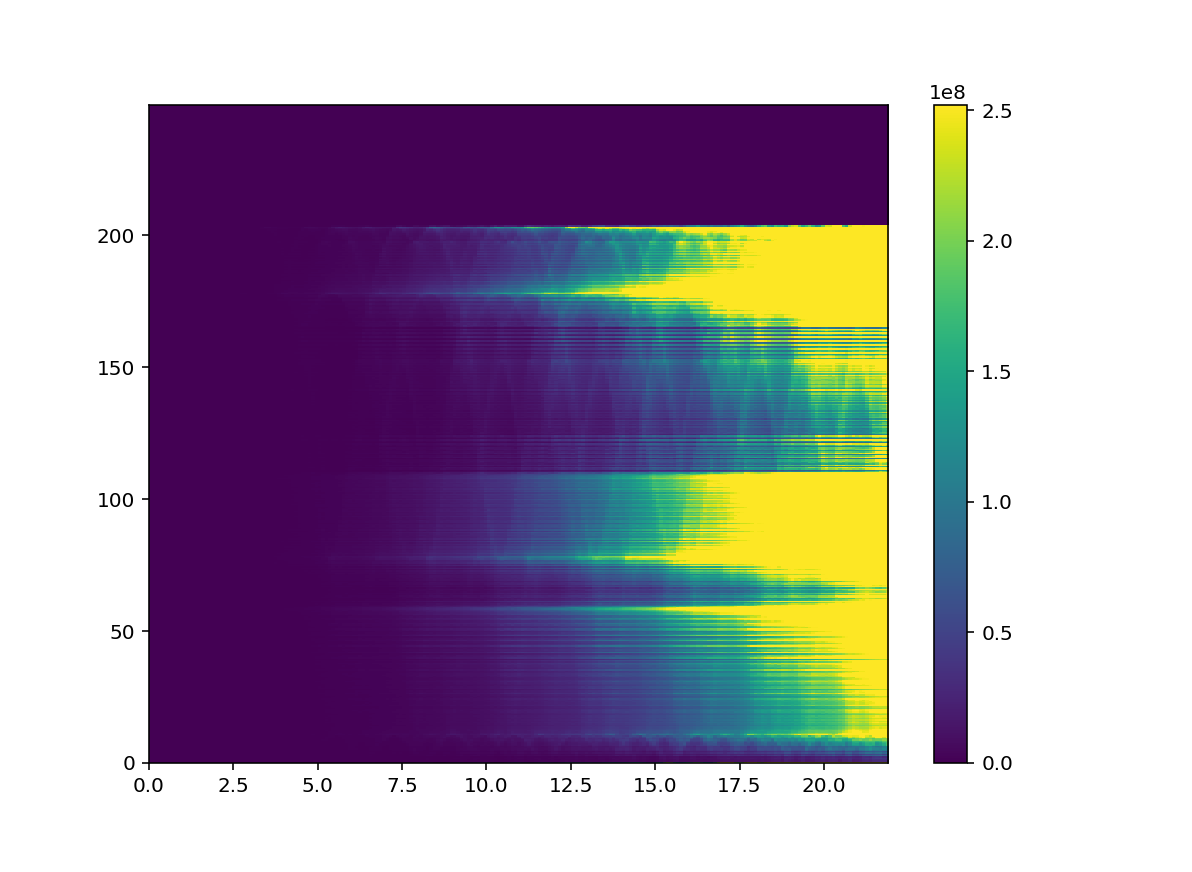

In [28]:
H.plot(IQEhist)